# Decil Analysis

## 0. Setup

### 0-1. Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Processing

### 1-1. Data Loading

In [2]:
df = pd.read_csv('/workspace/data/raw/uk_retail.csv')

### 1-2.Data Processing

In [4]:
df = df.rename(
    columns={'Customer ID': 'customer_id', 'Price': 'price'}
)

df = df.dropna(subset=['customer_id'])

df_customer = (
    df
    .groupby('customer_id', as_index=False)['price']
    .sum()
    .rename(columns={'price': 'sum'})
    .sort_values('sum', ascending=False)
)

In [5]:
df_customer['decile'] = pd.qcut(
    df_customer['sum'],
    10,
    labels=False,
    duplicates='drop'
)

df_customer['decile'] += 1

In [6]:
df_decile = (
    df_customer
    .groupby('decile')
    .agg(
        customers=('customer_id', 'count'),
        amount=('sum', 'sum')
    )
    .reset_index()
)

df_decile['share'] = (
    df_decile['amount'] / df_decile['amount'].sum() * 100
).round(1)

df_decile = df_decile.sort_values('decile', ascending=False).reset_index(drop=True)
df_decile['cum_share'] = df_decile['share'].cumsum()


df_decile['decile'] = df_decile['decile'].astype(int)
display(df_decile)
# df_decile.info()

,decile,customers,amount,share,cum_share
0,10,595,1767024.307,58.3,58.3
1,9,594,464745.381,15.3,73.6
2,8,594,280023.434,9.2,82.8
3,7,594,178879.370,5.9,88.7
4,6,594,124893.462,4.1,92.8
5,5,594,86343.103,2.8,95.6
6,4,594,59486.580,2.0,97.6
7,3,594,39678.801,1.3,98.9
8,2,594,22609.230,0.7,99.6
9,1,595,7337.540,0.2,99.8


## 2. Data Visualization

### 2-1. Graph

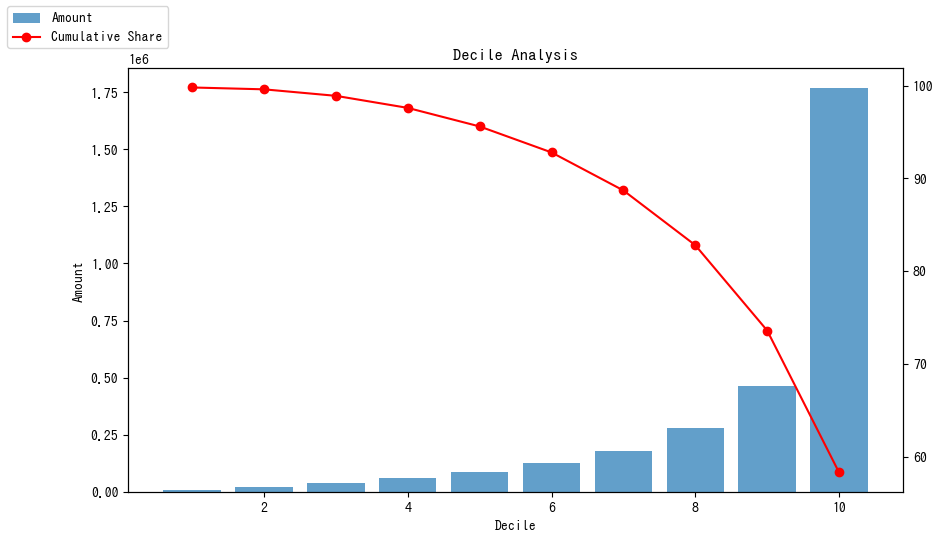

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 5.5))

bars = ax1.bar(
    df_decile['decile'],
    df_decile['amount'],
    alpha=0.7,
    label='Amount'
)

ax1.set_xlabel('Decile')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='y')
ax1.set_title('Decile Analysis')

ax2 = ax1.twinx()
ax2.plot(
    df_decile['decile'],
    df_decile['cum_share'],
    marker='o',
    color='red',
    label='Cumulative Share'
)

fig.legend(loc='upper left')
plt.show()

## 3. Insight

- 上位20%が売上の73.6%
- ミドル層は売上15%程度と薄い
- 下位層は売上に貢献していない